# **1. Perkenalan Dataset**


Dataset yang digunakan dalam proyek ini adalah Telco Customer Churn, yang diperoleh dari platform Kaggle, sebuah repositori publik terpercaya yang banyak digunakan dalam pengembangan dan eksperimen sistem machine learning.
Dataset ini berisi informasi mengenai pelanggan dari sebuah perusahaan telekomunikasi fiktif. Tujuan utama dari dataset ini adalah untuk memprediksi kemungkinan pelanggan berhenti berlangganan (churn) berdasarkan berbagai karakteristik, seperti jenis layanan, durasi berlangganan, dan biaya bulanan.

### Deskripsi Dataset
1. Jumlah baris: 7.043 entri (masing-masing merepresentasikan satu pelanggan)
2. Jumlah fitur: 21 kolom, terdiri dari:
3. Fitur numerik: tenure, MonthlyCharges, TotalCharges
4. Fitur kategorikal: gender, Partner, Dependents, PhoneService, InternetService, dsb.
5. Target: Churn (dengan nilai Yes atau No)

### Tujuan Penggunaan
Dataset ini sangat relevan untuk proyek MSML karena memenuhi beberapa karakteristik penting:
1. Dapat digunakan untuk klasifikasi biner (Churn atau Tidak)
2. Memiliki kombinasi fitur numerik dan kategorikal
3. Cocok untuk eksperimen preprocessing, pelatihan model, deployment, hingga monitoring dan alerting

Dataset ini akan digunakan dalam seluruh tahapan proyek akhir, mulai dari preprocessing, pelatihan model menggunakan MLflow, CI/CD workflow untuk retraining otomatis, hingga sistem monitoring dengan Prometheus dan Grafana.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [3]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# **3. Memuat Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Definisikan path ke folder tujuan
project_dir = "/content/drive/MyDrive/Project Colab/Dicoding/MembangunSistemMachineLearning/submission"

# Buat folder jika belum ada
os.makedirs(project_dir, exist_ok=True)

# Pindah ke folder tersebut
%cd "$project_dir"

/content/drive/MyDrive/Project Colab/Dicoding/MembangunSistemMachineLearning/submission


In [5]:
from google.colab import files
files.upload()  # Upload file kaggle.json kamu

# Setup Kaggle API key
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d blastchar/telco-customer-churn
!unzip telco-customer-churn.zip
!mv WA_Fn-UseC_-Telco-Customer-Churn.csv dataset_raw/

Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
telco-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [6]:
!mkdir -p dataset_raw
!mv WA_Fn-UseC_-Telco-Customer-Churn.csv dataset_raw/

mv: cannot stat 'WA_Fn-UseC_-Telco-Customer-Churn.csv': No such file or directory


In [7]:
df = pd.read_csv('dataset_raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print("Ukuran dataset:", df.shape)
df.head()

Ukuran dataset: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [8]:
df.info()
print("\nDeskripsi Statistik:\n", df.describe())
print("\nJumlah duplikat:", df.duplicated().sum())
print("\nJumlah missing values:\n", df.isnull().sum())
print("\nDistribusi target:\n", df['Churn'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **5. Data Preprocessing**

In [12]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/Project Colab/Dicoding/MembangunSistemMachineLearning/submission/telco-customer-churn.zip')

# Drop kolom ID
df.drop(columns=['customerID'], inplace=True)

# Ubah TotalCharges ke numerik
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Ubah kolom integer menjadi float
df["SeniorCitizen"] = df["SeniorCitizen"].astype("float64")
df["tenure"] = df["tenure"].astype("float64")

# Encode target: Churn (Yes/No) → 1/0
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Kolom kategorikal (selain Churn)
categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

# One-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Normalisasi fitur numerik
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Split fitur dan target
X = df.drop(columns=['Churn'])
y = df['Churn']

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Gabungkan kembali untuk disimpan
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Simpan hasil preprocessing
save_path = '../preprocessing/dataset_preprocessing'
os.makedirs(save_path, exist_ok=True)
train_df.to_csv(f'{save_path}/train.csv', index=False)
test_df.to_csv(f'{save_path}/test.csv', index=False)

print("Data berhasil dipreprocessing dan disimpan ke folder preprocessing/dataset_preprocessing/")

Data berhasil dipreprocessing dan disimpan ke folder preprocessing/dataset_preprocessing/


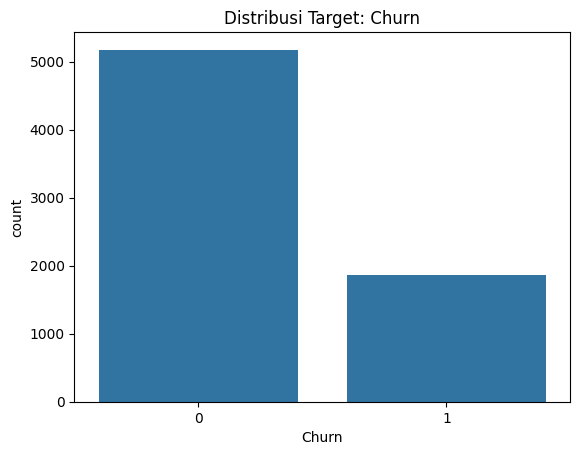

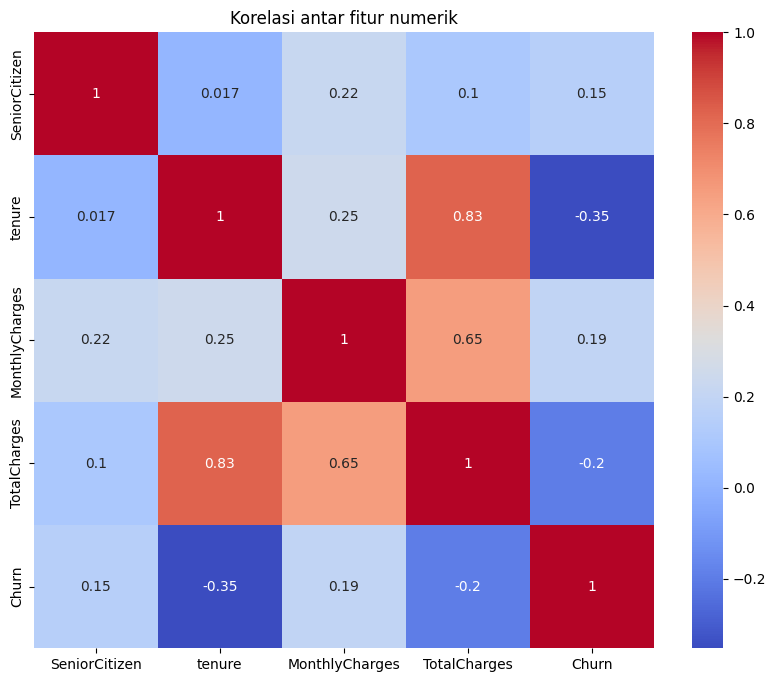

In [13]:
sns.countplot(data=df, x='Churn')
plt.title("Distribusi Target: Churn")

# Korelasi numerik
df_numeric = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi antar fitur numerik")
plt.show()